# Genomic Data Analysis using Python 🐍🧬

  ### Part 2. Analysis of VEP annotated NGS data 

In this notebook, we will continue our analysis of VCF (Variant Call Format) files. The VCF data has been annotated using **Variant Effect Prediction (VEP)** on the Ensembl platform (http://grch37.ensembl.org/Tools/VEP). <br > This complex annotation process assigns each variant a genetic impact and establishes connections to the associated genes. It also involves comprehensive variant information from the database. <br >
Here, we will compare annotated data from the male patient and  his mother to establish which likely-pathogenic variants could have been passed on from mother to son.  
We're going to do:
1. Data Preprocessing of the Vep annotated file
2. Exploratory Data Analysis on Variant Consequences
3. Selection of potentially harmful variants inherited by the patient. 

In [1]:
# First, all the necessary imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Data Preprocessing 

Result dataframe contains many important features that can be used in further analysis. The VEP output from Ensembl tells us in which way does a genetic change affects how genes work (how this changes influence molecular phenotype). <br > It uses special terms to describe these changes and gives us an idea of how important they are. Ensembl typically gives lots of annotations, but not all of them will be useful, so the first step will be to remove undesired columns and deal with the missing values. 


In [56]:
df_selected_son_variants = pd.read_csv('../Documents/NGS_data/VEP_annotated_son_data.txt', sep='\t')
pd.set_option('display.max_columns', None)
# replacing '-' with NaN for more convenient analysis in pandas 
df_selected_son_variants.replace('-', pd.NA, inplace=True)
df_selected_son_variants

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,SIFT,PolyPhen,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
0,.,20:10000117-10000117,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4816203,<NA>,1,NaN,HGNC,15803,NaN,NaN,NaN,NaN,NaN,NaN,0.6054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4816203,2503,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.6054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4816203,4343,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.6054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,.,20:10000211-10000211,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4813908,<NA>,1,NaN,HGNC,15803,NaN,NaN,NaN,NaN,NaN,NaN,0.6056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,.,20:10000211-10000211,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4813908,2409,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.6056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,NaN,1/2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN
2482,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000453544.1,antisense,NaN,2/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN
2483,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,1/4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN
2484,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000605592.1,antisense,NaN,1/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN


After Ensembl there are a few entries presenting different genetic molecular consequences for single position. Reason behind it can be a location of  variants on negative strand of DNA  
which could generate multiple effects. <br >  We should also assess all of the columns and choose which of them to remove:

In [57]:
for column in df_selected_son_variants.columns:
    if column != 'Location':
        print(column)
        print('#############')
        print(df_selected_son_variants[column].unique())


#Uploaded_variation
#############
['.']
Allele
#############
['T' 'G' 'A' 'AGGCT' 'C' 'TT' <NA> 'AA' 'GGGAGG' 'CA' 'AT' 'GATA'
 'GATAGATA' 'TATG' 'TTTTTTT' 'AAAAAAAAAAAAA' 'AG' 'AAA' 'TTT' 'TTTGTTTG'
 'TGTG' 'AGGCCACAA' 'AAAAAAAAAAAAAAA' 'TG' 'TA' 'AAGAAAGC' 'CAAACAAAC'
 'AGTCCTCCA' 'TGTGT']
Consequence
#############
['intron_variant,non_coding_transcript_variant' 'downstream_gene_variant'
 'non_coding_transcript_exon_variant'
 'splice_region_variant,splice_polypyrimidine_tract_variant,intron_variant,non_coding_transcript_variant'
 'upstream_gene_variant' 'intron_variant' '3_prime_UTR_variant'
 'mature_miRNA_variant' 'regulatory_region_variant' <NA>
 'TF_binding_site_variant']
IMPACT
#############
['MODIFIER' 'LOW' <NA>]
SYMBOL
#############
['ANKEF1' 'SNAP25-AS1' 'AL109754.1' <NA> 'RP11-416N4.4' 'RP11-416N4.1'
 'SNAP25']
Gene
#############
['ENSG00000132623' 'ENSG00000227906' 'ENSG00000264599' <NA>
 'ENSG00000230506' 'ENSG00000232448' 'ENSG00000132639']
Feature_type
#############
['Tr

In [58]:
# Removing empty columns and columns with unwanted data: 
columns_to_remove = []
for column in df_selected_son_variants.columns:
    if df_selected_son_variants[column].isna().all():
        columns_to_remove.append(column)
    elif column in ['MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 
                    'MOTIF_SCORE_CHANGE', 'FLAGS']:
        columns_to_remove.append(column)
    
df_preprocessed_variants_SON = df_selected_son_variants.drop(columns=columns_to_remove)
df_preprocessed_variants_SON


,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,Existing_variation,DISTANCE,STRAND,SYMBOL_SOURCE,HGNC_ID,AF,PHENO,PUBMED,TRANSCRIPTION_FACTORS
0,.,20:10000117-10000117,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,rs4816203,<NA>,1,HGNC,15803,0.6054,NaN,NaN,NaN
1,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,rs4816203,2503,-1,HGNC,44312,0.6054,NaN,NaN,NaN
2,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,<NA>,NaN,rs4816203,4343,-1,HGNC,44312,0.6054,NaN,NaN,NaN
3,.,20:10000211-10000211,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,rs4813908,<NA>,1,HGNC,15803,0.6056,NaN,NaN,NaN
4,.,20:10000211-10000211,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,rs4813908,2409,-1,HGNC,44312,0.6056,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,NaN,1/2,NaN,rs6039769,NaN,-1,HGNC,44312,0.8131,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN
2482,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000453544.1,antisense,NaN,2/3,NaN,rs6039769,NaN,-1,HGNC,44312,0.8131,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN
2483,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,1/4,NaN,rs6039769,NaN,-1,HGNC,44312,0.8131,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN
2484,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000605592.1,antisense,NaN,1/3,NaN,rs6039769,NaN,-1,HGNC,44312,0.8131,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN


## 2. Exploratory Data Analysis on Variant Consequences

In the **'PHENO'** column (Phenotype of the Disease), we can find annotations related to diseases associated with existing genetic variants. When the consequences of a variant are likely associated with disease, it's described as '1.' Common variants not associated with any disease in our dataframe are marked with NaN.

To get an overall understanding of the data and what kind of genetic impact do variants of different Consequences have on molecular level we will visualise the data from two columns: **"Consequences"** and **"IMPACT"**  

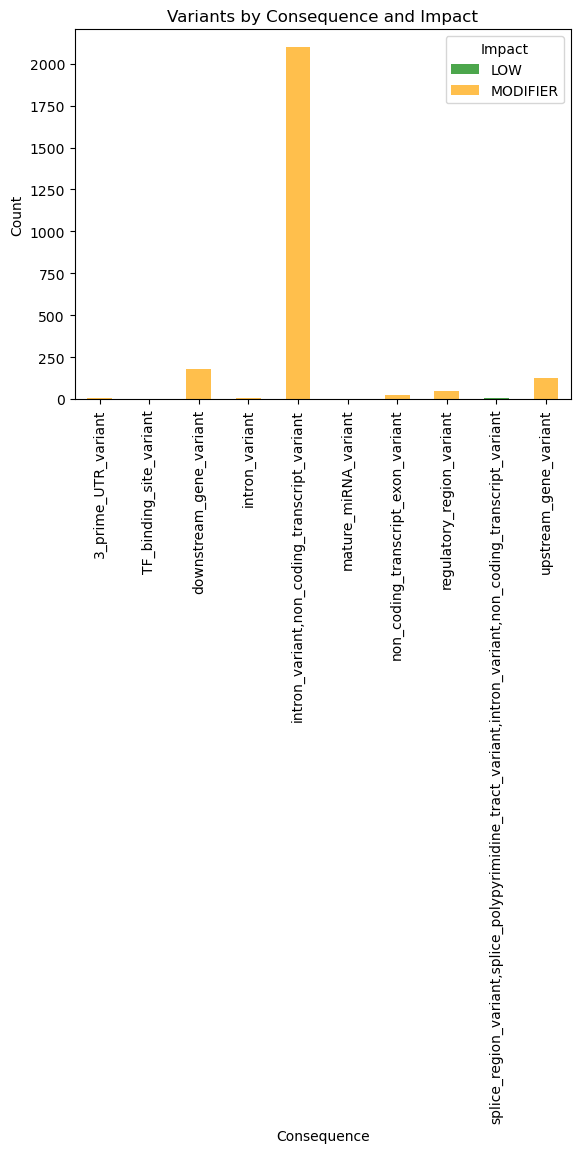

In [77]:
counts = df_preprocessed_variants_SON.groupby(['Consequence', 'IMPACT']).size().unstack(fill_value=0)

# Creating the bar chart
counts.plot(kind='bar', stacked=True, color=['green', 'orange'], alpha=0.7)

plt.title('Variants by Consequence and Impact')
plt.xlabel('Consequence')
plt.ylabel('Count')
plt.legend(title='Impact', loc='upper right')

plt.show()

We can see that majority of variants are non-coding intron variants with **'MODIFIER'** label. There are no 'HIGH' and 'MODERATE' labels which could suggest direct connection between the variant and disease. In SNPeff annotation 'MODIFIER' is a label used to describe variants, often in non- coding regions, that are unlikely to cause significant changes in the gene's function. However, in some rare genetic diseases, despite having low functional impact on the gene, MODIFIER variants can still be a cause of regulation disruption.  

Ensembl annotation provides data on Allele Frequency (**'AF'**) of every variant based on 1000 Genomes Projects. 
Investigating rare diseases, we can filter variants more frequently present in population using AF using cut-off point of AF < 0.2. 

In [87]:
# Because of the missing data in this column, we need to convert <NA> to NaN and then skip it in filtering
numeric_AF = pd.to_numeric(df_preprocessed_variants_SON['AF'], errors='coerce')
filtered_df_SON = df_preprocessed_variants_SON[(df_preprocessed_variants_SON['PHENO'] == '1') & pd.notna(numeric_AF) & (numeric_AF < 0.2)]
filtered_df_SON

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,Existing_variation,DISTANCE,STRAND,SYMBOL_SOURCE,HGNC_ID,AF,PHENO,PUBMED,TRANSCRIPTION_FACTORS
917,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000421143.2,antisense,<NA>,2/3,<NA>,rs543895,<NA>,-1,HGNC,44312,0.1991,1,27903959,<NA>
918,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000426491.1,antisense,<NA>,2/4,<NA>,rs543895,<NA>,-1,HGNC,44312,0.1991,1,27903959,<NA>
919,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,<NA>,2/2,<NA>,rs543895,<NA>,-1,HGNC,44312,0.1991,1,27903959,<NA>
920,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000453544.1,antisense,<NA>,3/3,<NA>,rs543895,<NA>,-1,HGNC,44312,0.1991,1,27903959,<NA>
921,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,<NA>,2/4,<NA>,rs543895,<NA>,-1,HGNC,44312,0.1991,1,27903959,<NA>
922,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000605592.1,antisense,<NA>,3/3,<NA>,rs543895,<NA>,-1,HGNC,44312,0.1991,1,27903959,<NA>
923,.,20:10094251-10094251,A,regulatory_region_variant,MODIFIER,<NA>,<NA>,RegulatoryFeature,ENSR00001216258,enhancer,<NA>,<NA>,<NA>,rs543895,<NA>,<NA>,<NA>,<NA>,0.1991,1,27903959,<NA>
1429,.,20:10107686-10107686,T,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000421143.2,antisense,<NA>,2/3,<NA>,rs555185,<NA>,-1,HGNC,44312,0.1873,1,27903959,<NA>
1430,.,20:10107686-10107686,T,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000426491.1,antisense,<NA>,2/4,<NA>,rs555185,<NA>,-1,HGNC,44312,0.1873,1,27903959,<NA>
1431,.,20:10107686-10107686,T,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,<NA>,2/2,<NA>,rs555185,<NA>,-1,HGNC,44312,0.1873,1,27903959,<NA>


## 3. Inheritance of Variants 

After selecting the son's variants of interest, we have a reference dataset that can be compared with the genomic information of the mother. For consistency, we will process this data using the same methodology previously described:

In [89]:
df_selected_mother_variants = pd.read_csv('../Documents/NGS_data/VEP_annotated_ensembl.mother.txt', sep= '\t')
pd.set_option('display.max_columns', None)
# replacing '-' with NaN for more convenient analysis in pandas 
df_selected_mother_variants.replace('-', pd.NA, inplace=True)
df_selected_mother_variants

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,HGVSc,HGVSp,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,MANE_SELECT,MANE_PLUS_CLINICAL,TSL,APPRIS,SIFT,PolyPhen,AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
0,.,20:10000117-10000117,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4816203,<NA>,1,NaN,HGNC,15803,NaN,NaN,NaN,NaN,NaN,NaN,0.6054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4816203,2503,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.6054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4816203,4343,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.6054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,.,20:10000211-10000211,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4813908,<NA>,1,NaN,HGNC,15803,NaN,NaN,NaN,NaN,NaN,NaN,0.6056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,.,20:10000211-10000211,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs4813908,2409,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.6056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,NaN,1/2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN
2464,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000453544.1,antisense,NaN,2/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN
2465,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,1/4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN
2466,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000605592.1,antisense,NaN,1/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,NaN,HGNC,44312,NaN,NaN,NaN,NaN,NaN,NaN,0.8131,NaN,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN,NaN,NaN,NaN,NaN


In [90]:
# Removing empty columns and columns with unwanted data: 
columns_to_remove = []
for column in df_selected_mother_variants.columns:
    if df_selected_mother_variants[column].isna().all():
        columns_to_remove.append(column)
    elif column in ['MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 
                    'MOTIF_SCORE_CHANGE', 'FLAGS']:
        columns_to_remove.append(column)
    
df_preprocessed_variants_MOTHER = df_selected_son_variants.drop(columns=columns_to_remove)
df_preprocessed_variants_MOTHER

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,SYMBOL_SOURCE,HGNC_ID,SIFT,PolyPhen,AF,SOMATIC,PHENO,PUBMED,TRANSCRIPTION_FACTORS
0,.,20:10000117-10000117,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,NaN,NaN,NaN,NaN,rs4816203,<NA>,1,HGNC,15803,NaN,NaN,0.6054,NaN,NaN,NaN,NaN
1,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,rs4816203,2503,-1,HGNC,44312,NaN,NaN,0.6054,NaN,NaN,NaN,NaN
2,.,20:10000117-10000117,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,rs4816203,4343,-1,HGNC,44312,NaN,NaN,0.6054,NaN,NaN,NaN,NaN
3,.,20:10000211-10000211,T,"intron_variant,non_coding_transcript_variant",MODIFIER,ANKEF1,ENSG00000132623,Transcript,ENST00000437504.1,processed_transcript,NaN,1/1,NaN,NaN,NaN,NaN,NaN,rs4813908,<NA>,1,HGNC,15803,NaN,NaN,0.6056,NaN,NaN,NaN,NaN
4,.,20:10000211-10000211,T,downstream_gene_variant,MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603245.1,antisense,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,rs4813908,2409,-1,HGNC,44312,NaN,NaN,0.6056,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,NaN,1/2,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,HGNC,44312,NaN,NaN,0.8131,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN
2482,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000453544.1,antisense,NaN,2/3,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,HGNC,44312,NaN,NaN,0.8131,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN
2483,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,NaN,1/4,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,HGNC,44312,NaN,NaN,0.8131,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN
2484,.,20:10198954-10198954,C,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000605592.1,antisense,NaN,1/3,NaN,NaN,NaN,NaN,NaN,rs6039769,NaN,-1,HGNC,44312,NaN,NaN,0.8131,NaN,NaN,"18821566,27047369,24391914,31653583,28972123,2...",NaN


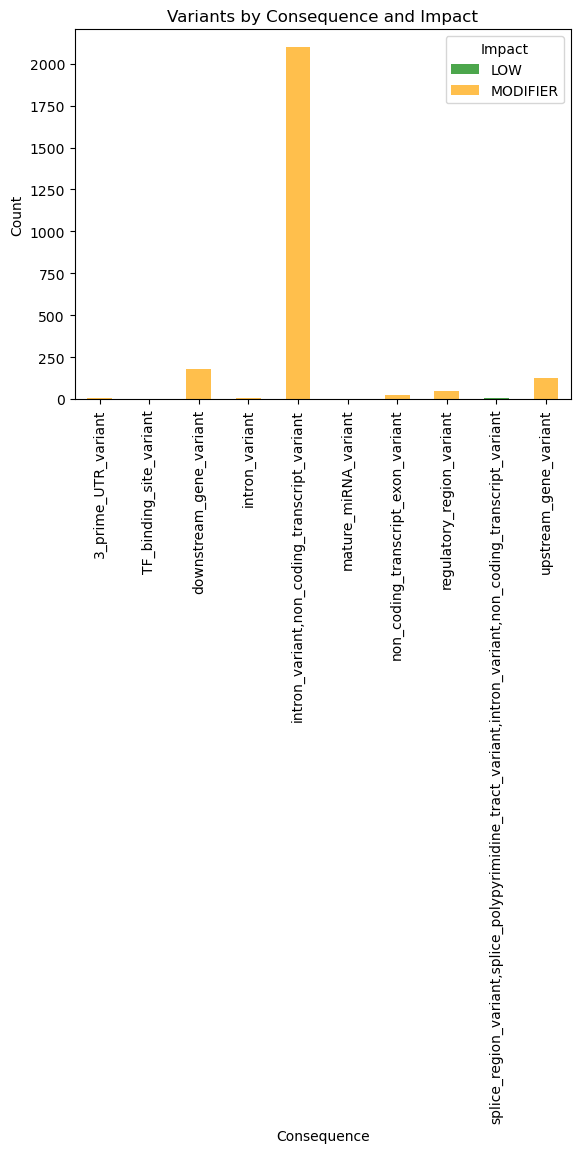

In [91]:
counts = df_preprocessed_variants_MOTHER.groupby(['Consequence', 'IMPACT']).size().unstack(fill_value=0)

# Creating the bar chart
counts.plot(kind='bar', stacked=True, color=['green', 'orange'], alpha=0.7)

plt.title('Variants by Consequence and Impact')
plt.xlabel('Consequence')
plt.ylabel('Count')
plt.legend(title='Impact', loc='upper right')

plt.show()

In [92]:
numeric_AF = pd.to_numeric(df_preprocessed_variants_MOTHER['AF'], errors='coerce')
filtered_df_MOTHER = df_preprocessed_variants_MOTHER[(df_preprocessed_variants_MOTHER['PHENO'] == '1') & pd.notna(numeric_AF) & (numeric_AF < 0.2)]
filtered_df_MOTHER

,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,DISTANCE,STRAND,SYMBOL_SOURCE,HGNC_ID,SIFT,PolyPhen,AF,SOMATIC,PHENO,PUBMED,TRANSCRIPTION_FACTORS
917,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000421143.2,antisense,<NA>,2/3,<NA>,<NA>,<NA>,<NA>,<NA>,rs543895,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1991,<NA>,1,27903959,<NA>
918,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000426491.1,antisense,<NA>,2/4,<NA>,<NA>,<NA>,<NA>,<NA>,rs543895,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1991,<NA>,1,27903959,<NA>
919,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,<NA>,2/2,<NA>,<NA>,<NA>,<NA>,<NA>,rs543895,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1991,<NA>,1,27903959,<NA>
920,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000453544.1,antisense,<NA>,3/3,<NA>,<NA>,<NA>,<NA>,<NA>,rs543895,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1991,<NA>,1,27903959,<NA>
921,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000603542.1,antisense,<NA>,2/4,<NA>,<NA>,<NA>,<NA>,<NA>,rs543895,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1991,<NA>,1,27903959,<NA>
922,.,20:10094251-10094251,A,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000605592.1,antisense,<NA>,3/3,<NA>,<NA>,<NA>,<NA>,<NA>,rs543895,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1991,<NA>,1,27903959,<NA>
923,.,20:10094251-10094251,A,regulatory_region_variant,MODIFIER,<NA>,<NA>,RegulatoryFeature,ENSR00001216258,enhancer,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,rs543895,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.1991,<NA>,1,27903959,<NA>
1429,.,20:10107686-10107686,T,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000421143.2,antisense,<NA>,2/3,<NA>,<NA>,<NA>,<NA>,<NA>,rs555185,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1873,<NA>,1,27903959,<NA>
1430,.,20:10107686-10107686,T,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000426491.1,antisense,<NA>,2/4,<NA>,<NA>,<NA>,<NA>,<NA>,rs555185,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1873,<NA>,1,27903959,<NA>
1431,.,20:10107686-10107686,T,"intron_variant,non_coding_transcript_variant",MODIFIER,SNAP25-AS1,ENSG00000227906,Transcript,ENST00000451151.1,antisense,<NA>,2/2,<NA>,<NA>,<NA>,<NA>,<NA>,rs555185,<NA>,-1,HGNC,44312,<NA>,<NA>,0.1873,<NA>,1,27903959,<NA>


As we can see, both in case of mother and the son there are variants associated with SNAP25-AS1 (antisense RNA) flagged with "Phenotype of Disease". Antisense RNA can play a crucial role in gene expression regulation at multiple levels, such as at replication, transcription, and translation. SNAP25 gene is involved in neurotransmitter release and plays important role in synapsis function. Disorders linked with this gene can be a cause of a rare genetically conditioned diseases, such as different kinds of Epileptic Encephalopathy (reference:https://www.genecards.org/cgi-bin/carddisp.pl?gene=SNAP25&keywords=SNAP25#diseases). <br >
Disorders associated with antisense RNA linked with this gene can play important role in development of the disease. <br > 
This analysis was based mostly on Ensembl classification of pathogenic variants. To further specify different variants that weren't annotated as pathogenic here but can still be linked with the disease, additional annotation to the Clinvar database should be performed, as well as thorough literature research. 
